<a href="https://colab.research.google.com/github/risen9/scaler-projects/blob/main/Walmart_Business_Case_Confidence_Interval_and_CLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## Problem Statement

Walmart is an American Retail corporation with more than 100 million customers worldwide. They want us to analyse customer purchase behavior against customer parameters like gender and want to see if spending habits differ between male and female customers.

We need to find out if women spend more than men on Black Friday and find out how to get more people to buy stuff from Walmart.

## 1. Basic Metrics


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import copy


In [ ]:
data_walmart = pd.read_csv('walmart_data.csv')

In [ ]:
data_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
data_walmart.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
data_walmart.head(7)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215


In [ ]:
data_walmart.shape

(550068, 10)



*   Data has 10 columns with user data
*   We need to change all categorical data to category data types



### Checking datatype to category

In [ ]:
for i in data_walmart.columns[:-1]:
  data_walmart[i] = data_walmart[i].astype('category')

In [ ]:
data_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


### Statistical summary of categorical values

In [ ]:
data_walmart.describe(include ='category')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


* There are 5891 unique user IDs and 3631 unique products.
* Most of the transactions were made by males with 414,259 transactions
* The 26-35 age group makes up most of the customers with 219,587 falling in that age group
* Single people made up most of the transactions with 324,731.

###Statistical summary of numerical values

In [ ]:
data_walmart.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


* The mean purchase value is \$9,264 and the highest purchase coming at \$23,961
* The smallest purchase was \$12.
* 50th percentile, or the median is \$8047, which is lower than the mean.           

### Duplicate value check

In [ ]:
data_walmart.duplicated().value_counts()

False    550068
Name: count, dtype: int64

No duplicate values found

### Outlier check

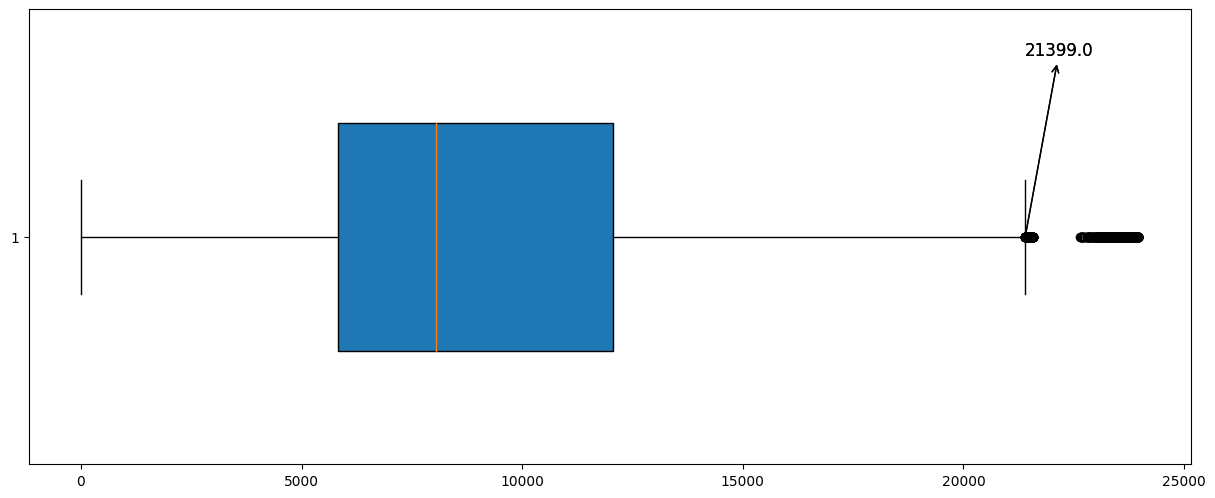

In [ ]:
fig = plt.figure(figsize = (15,10))
gs = fig.add_gridspec(2,1,height_ratios=[0.65, 0.35])

ax1 = fig.add_subplot(gs[0,0])
boxplot = ax1.boxplot(x = data_walmart['Purchase'],vert = False,patch_artist = True,widths = 0.5)

info = [i.get_xdata() for i in boxplot['whiskers']]
median = data_walmart['Purchase'].quantile(0.5)


for i in info:
  ax1.annotate(text = f"{j:.1f}", xy = (j,1), xytext = (j,1.4),fontsize = 12, arrowprops= dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))

plt.show()





* We can see that the outlier lie past \$21,399 mark.

* So we can count how many datapoints are beyond this mark to know how many outliers there are

In [ ]:
len(data_walmart.loc[data_walmart['Purchase'] > 21399,'Purchase'])

2677

* There are 2677 outlier values in the purchases column

### Converting Marital Status from 1s and 0s to 'Married' and 'Unmarried'

In [ ]:
data_walmart['Marital_Status'] = data_walmart['Marital_Status'].replace({0:'Unmarried',1:'Married'})
data_walmart['Marital_Status'].unique()

['Unmarried', 'Married']
Categories (2, object): ['Unmarried', 'Married']

## 2. Categorical Data Analysis

### Gender, City and Marital Status

Text(0.5, 1.0, 'City Category')

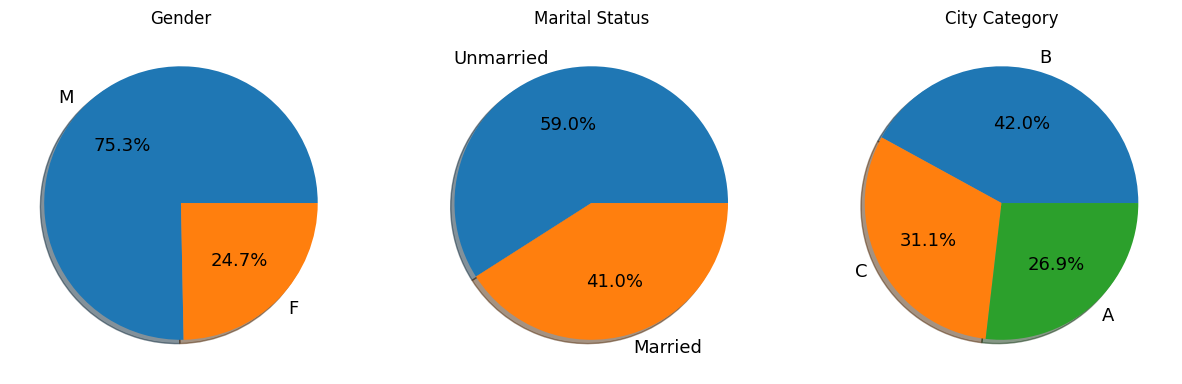

In [ ]:
fig = plt.figure(figsize = (15,10))
gs = fig.add_gridspec(1,3)

# Gender
ax0 = fig.add_subplot(gs[0,0])
ax0.pie(data_walmart['Gender'].value_counts().values,labels = data_walmart['Gender'].value_counts().index,autopct = '%.1f%%',
        textprops={'fontsize': 13, 'color': 'black'})
ax0.set_title('Gender')

# Marital Status

ax1 = fig.add_subplot(gs[0,1])
ax1.pie(data_walmart['Marital_Status'].value_counts().values,labels = data_walmart['Marital_Status'].value_counts().index,autopct = '%.1f%%',
        textprops={'fontsize': 13, 'color': 'black'})
ax1.set_title('Marital Status')

# City category

ax2 = fig.add_subplot(gs[0,2])
ax2.pie(data_walmart['City_Category'].value_counts().values,labels = data_walmart['City_Category'].value_counts().index,autopct = '%.1f%%',
        textprops={'fontsize': 13, 'color': 'black'})
ax2.set_title('City Category')

* Graphical analysis corroborates our earlier statistical analysis

* Males made up the majority of purchases, unmarried people topped the marital status category.

* Purchase distribution was somewhat even between cities, but City category B has the majority here.

### Customer ages

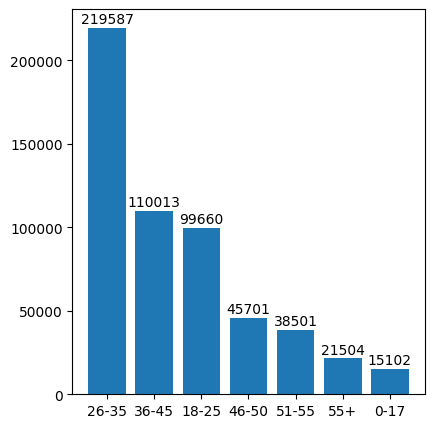

In [ ]:
fig = plt.figure(figsize = (10,5))
gs = fig.add_gridspec(1,2)

# barplot with ages
ax0 = fig.add_subplot(gs[0,0])
tp_age = data_walmart['Age'].value_counts()
ax0.bar(x=tp_age.index,height = tp_age.values)

# labeling ages

for i in tp_age.index:
    ax0.text(i,tp_age[i]+5000,tp_age[i],ha = 'center',va = 'center')

* The largest share of purchases were made by the 26-35 age group, followed by 36-45 group.
* The least were made by the 0-17 group, followed by 55+, 51-55 and 46-50.

### Customer stay in current city analysis

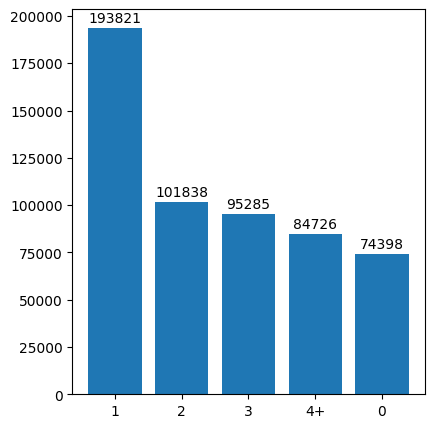

In [ ]:
fig = plt.figure(figsize = (10,5))
gs = fig.add_gridspec(1,2)

# barplot with current city
ax0 = fig.add_subplot(gs[0,0])
tp_Stay = data_walmart['Stay_In_Current_City_Years'].value_counts()
ax0.bar(x=tp_Stay.index,height = tp_Stay.values)

# labeling current city

for i in tp_Stay.index:
    ax0.text(i,tp_Stay[i]+5000,tp_Stay[i],ha = 'center',va = 'center')

* Most customers have only been staying in their current city for 1 year.
* The fewest amount of customers are ones who haven't lived in that city for more than a year.

### Sales analysis and top performing products and product categories

Top 10 products

Text(0, 0.5, 'Product ID')

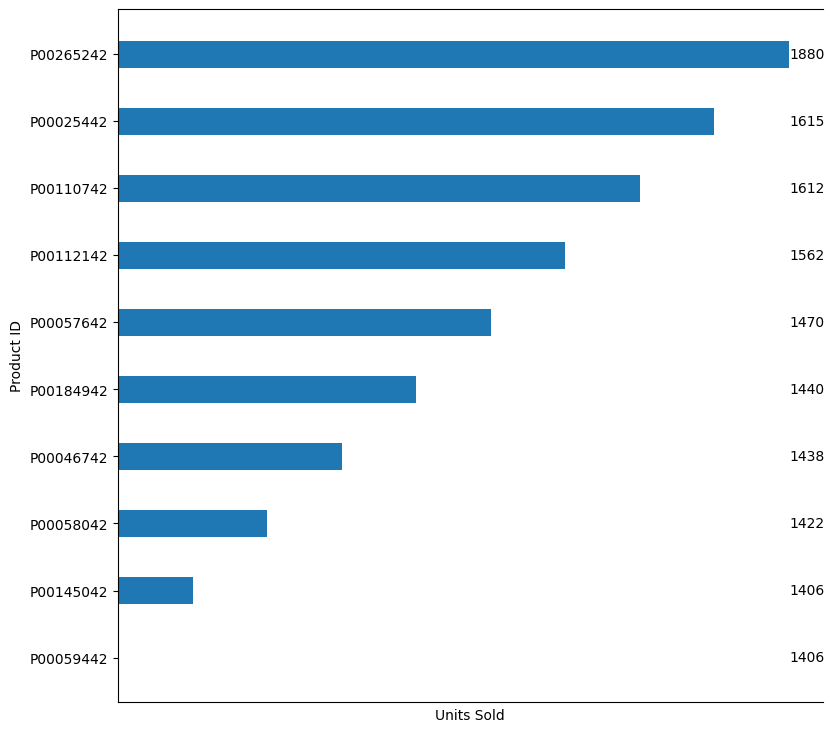

In [ ]:
fig = plt.figure(figsize = (20,9))
gs = fig.add_gridspec(1,2)

# top 10 product

ax0 = fig.add_subplot(gs[0,0])
tp_prod = data_walmart['Product_ID'].value_counts()[0:10]
tp_prod = tp_prod.iloc[-1:-11:-1] # reversing for top 10

# plot

ax0.barh(y=tp_prod.index, width=tp_prod.index, height = 0.4)
ax0.set_xticks([]) # removing x axis

# labeling bars
for y,x in zip(tp_prod.index,tp_prod.values):
    ax0.text( 9 , y , x,va='center')

# removing right line
for s in ['right']:
    ax0.spines[s].set_visible(False)

# label axes
ax0.set_xlabel('Units Sold')
ax0.set_ylabel('Product ID')

* The sales numbers of different products that Walmart sells don't have much difference product to product.

* This could mean that Walmart has a ton of popular products that all sell relatively well.

Top 10 product categories

Text(0, 0.5, 'Product Category')

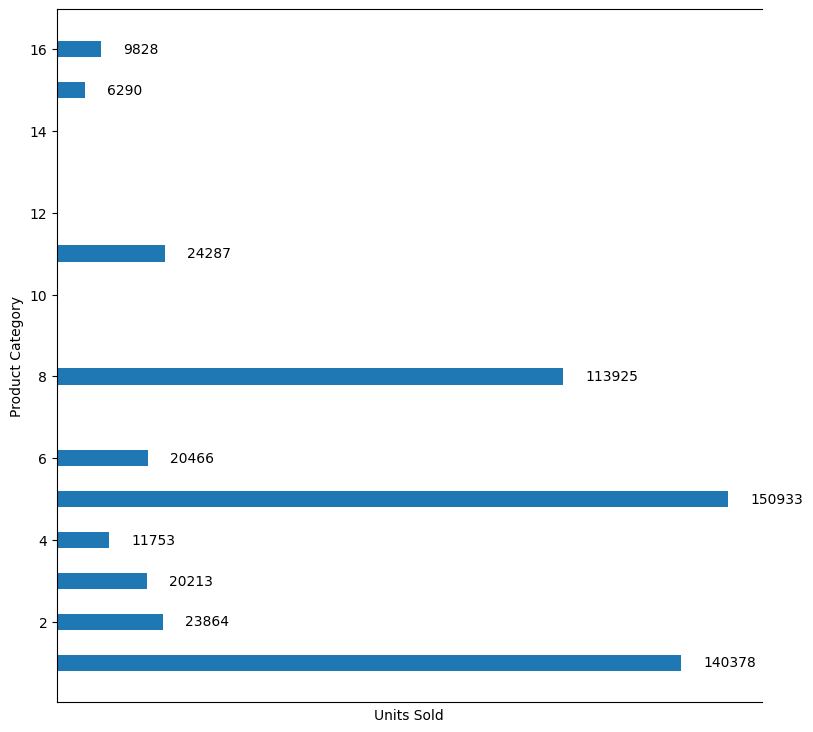

In [ ]:
fig = plt.figure(figsize = (20,9))
gs = fig.add_gridspec(1,2)

# top 10 product categories

ax0 = fig.add_subplot(gs[0,0])
tp_prodcat = data_walmart['Product_Category'].value_counts()[0:10]
tp_prodcat = tp_prodcat.iloc[-1:-11:-1] # reversing for top 10

# plot

ax0.barh(y=tp_prodcat.index, width=tp_prodcat.values, height = 0.4)
ax0.set_xticks([]) # removing x axis

# labeling bars
for y,x in zip(tp_prodcat.index,tp_prodcat.values):
    ax0.text( x+5000 , y , x,va='center')

# removing right line
for s in ['right']:
    ax0.spines[s].set_visible(False)

# label axes
ax0.set_xlabel('Units Sold')
ax0.set_ylabel('Product Category')

* The best selling product category is 5, followed by 1 and 8.

## 3. Bivariate analysis

### Purchase patterns across gender, marital status and city groups.

In [ ]:
# boxplots of purchases vs categories

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

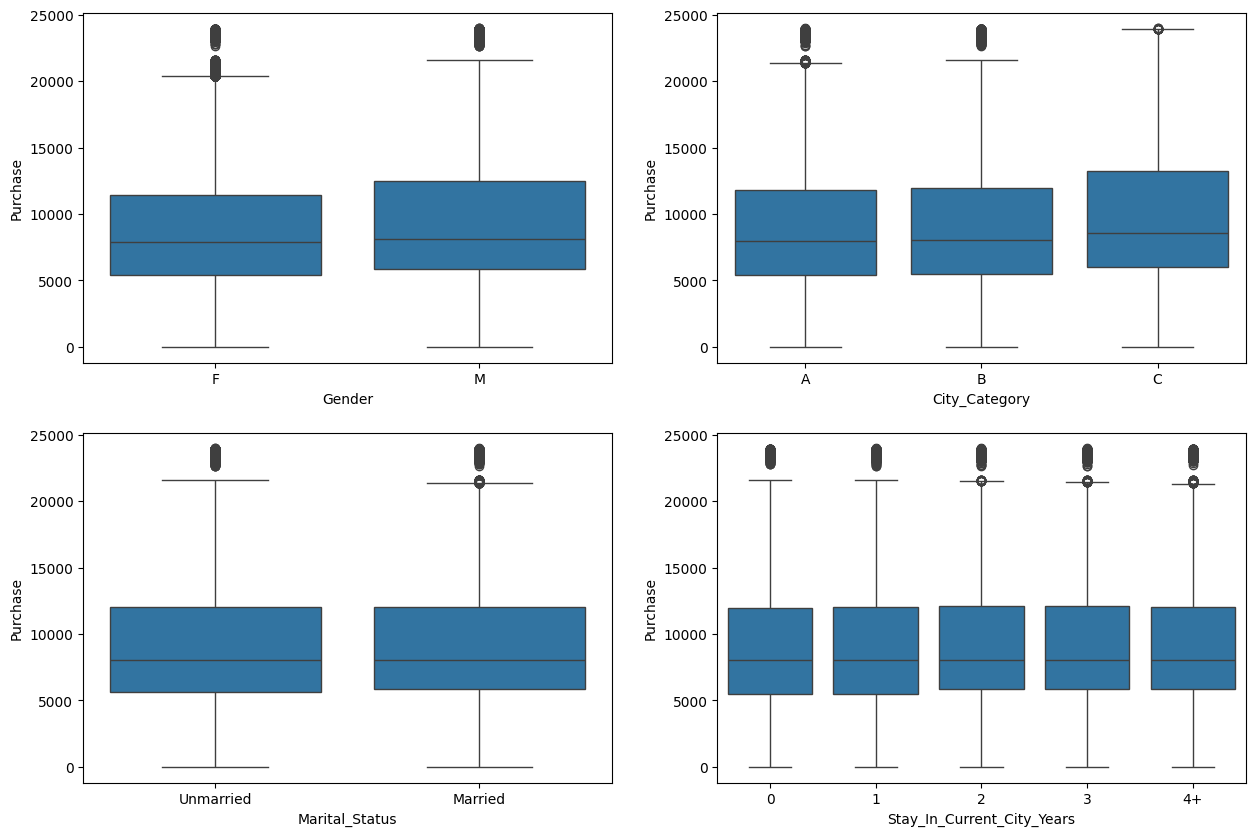

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(15,10))


# Gender
sns.boxplot(data = data_walmart, x='Gender', y='Purchase', ax=ax[0,0])

# Marital Status
sns.boxplot(data = data_walmart, x='Marital_Status', y='Purchase', ax=ax[1,0])

# City Category
sns.boxplot(data = data_walmart, x='City_Category', y='Purchase', ax=ax[0,1])

# Stayed in city
sns.boxplot(data = data_walmart, x='Stay_In_Current_City_Years', y='Purchase', ax=ax[1,1])

<Axes: xlabel='Age', ylabel='Purchase'>

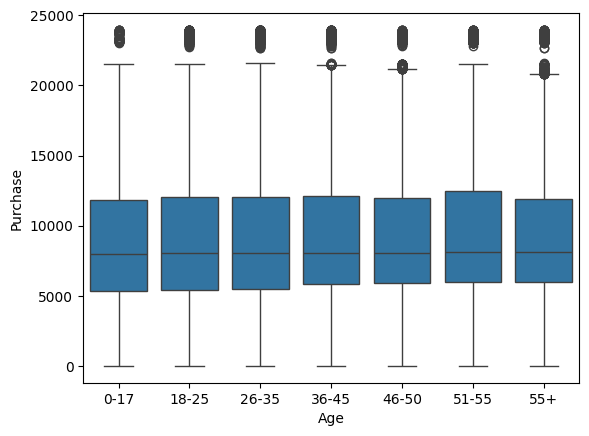

In [ ]:
# Age box plot
sns.boxplot(data = data_walmart, x='Age', y='Purchase')

* Purchase amount largely remains the same regardless of the variable being checked against.

# 4. Comparing Gender, age and Marital status with purchase amount

We will be creating a copy of the original df to preserve original df's integrity



In [ ]:
 # grouping purchases by gender and then selecting only purchase amount
tp_walmart = data_walmart.groupby('Gender')['Purchase'].agg(['sum','count']).reset_index()

tp_walmart['Percentage'] = round(tp_walmart['sum']/tp_walmart['sum'].sum(),2)*100
tp_walmart.head()


,Gender,sum,count,Percentage
0,F,1186232642,135809,23.0
1,M,3909580100,414259,77.0


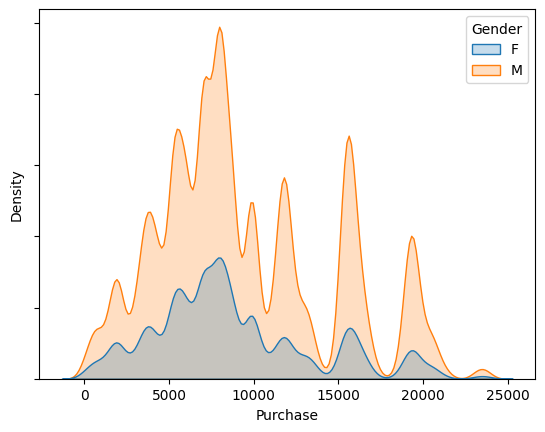

In [ ]:
# creating plot

a1 = sns.kdeplot(data = data_walmart, x ='Purchase', hue='Gender',fill = True)
a1.set(yticklabels=[])

plt.show()

In [ ]:
marry_walmart = data_walmart.groupby('Marital_Status')['Purchase'].agg(['sum','count']).reset_index()

marry_walmart['Percentage'] = round(marry_walmart['sum']/marry_walmart['sum'].sum(),2)*100
marry_walmart.head()


,Marital_Status,sum,count,Percentage
0,Unmarried,3008927447,324731,59.0
1,Married,2086885295,225337,41.0


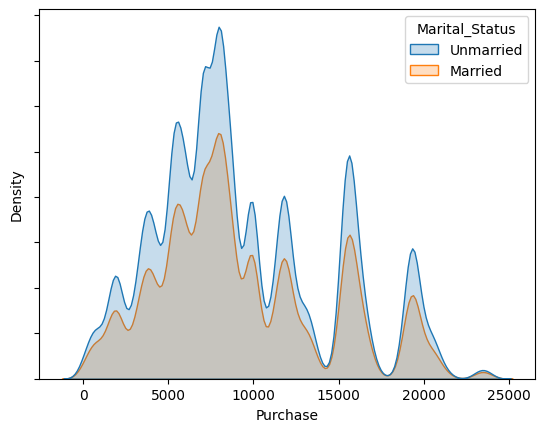

In [ ]:
# creating plot

a1 = sns.kdeplot(data = data_walmart, x ='Purchase', hue='Marital_Status',fill = True)
a1.set(yticklabels=[])

plt.show()

In [ ]:
age_walmart = data_walmart.groupby('Age')['Purchase'].agg(['sum','count']).reset_index()

age_walmart['Percentage'] = round(age_walmart['sum']/age_walmart['sum'].sum(),2)*100
age_walmart.head()

,Age,sum,count,Percentage
0,0-17,134913183,15102,3.0
1,18-25,913848675,99660,18.0
2,26-35,2031770578,219587,40.0
3,36-45,1026569884,110013,20.0
4,46-50,420843403,45701,8.0


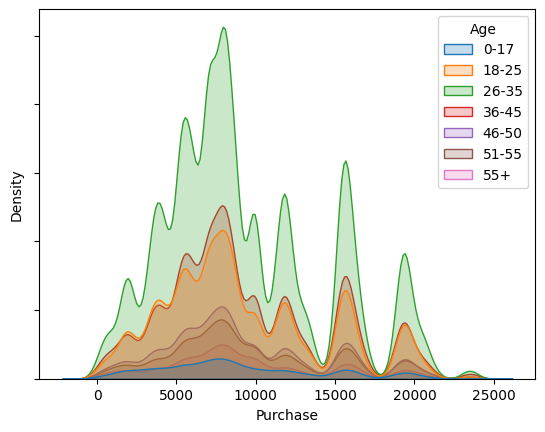

In [ ]:
# creating plot

a1 = sns.kdeplot(data = data_walmart, x ='Purchase', hue='Age',fill = True)
a1.set(yticklabels=[])

plt.show()

The purchase amounts are not normally distributed for all three cases, so we will have to use Central Limit Theorem and reconstruct the distribution to a normal distribution of a sample.

# 5. Creating a CLT Curve

<Axes: ylabel='Density'>

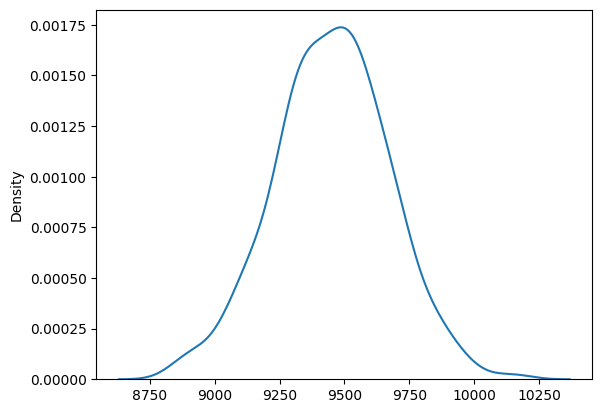

In [ ]:
# taking 500 random samples and taking the mean
sample_male = [data_walmart[data_walmart['Gender']=='M']['Purchase'].sample(500, replace = True).mean() for i in range (500)]


sns.kdeplot(sample_male)

In [ ]:
# repeating the same here

sample_female = [data_walmart[data_walmart['Gender']=='F']['Purchase'].sample(500, replace = True).mean() for i in range (500)]

<Axes: ylabel='Density'>

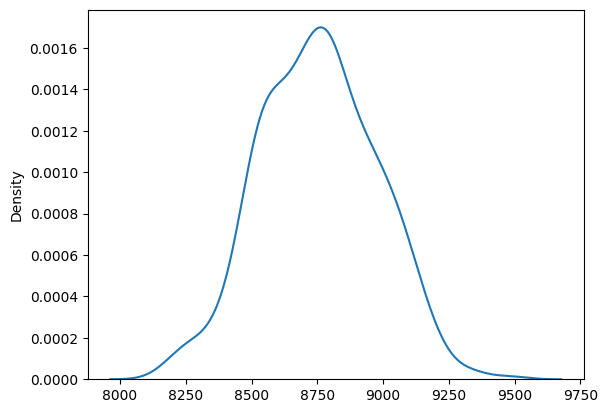

In [ ]:
sns.kdeplot(sample_female)

According to CLT, the new samples will give us a normal distribution that we can work with

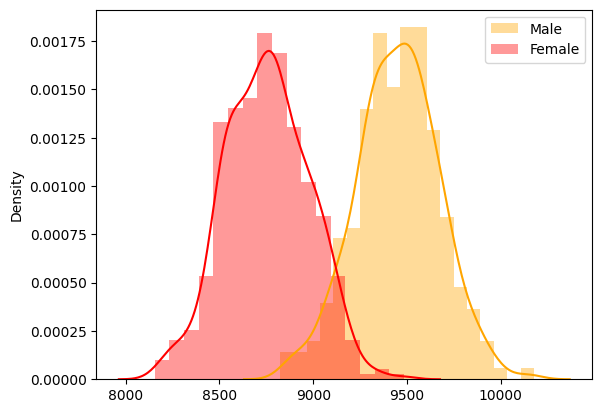

In [ ]:
sns.distplot(sample_male, label='Male', color = 'orange')
sns.distplot(sample_female, label='Female', color = 'red')
plt.legend()

We will now be doing the same for Marital status

In [ ]:
sample_married = [data_walmart[data_walmart['Marital_Status']=='Married']['Purchase'].sample(500, replace = True).mean() for i in range (500)]
sample_unmarried = [data_walmart[data_walmart['Marital_Status']=='Unmarried']['Purchase'].sample(500, replace = True).mean() for i in range (500)]


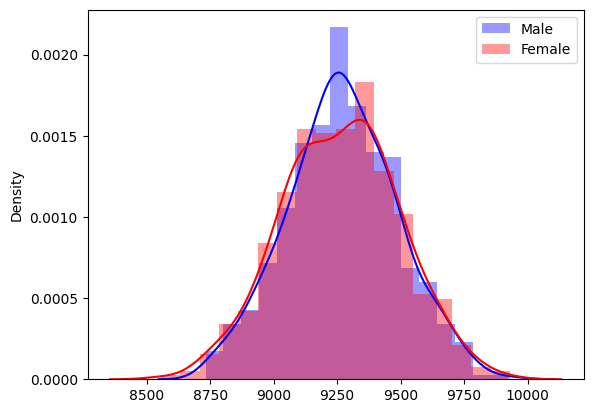

In [ ]:
sns.distplot(sample_married, label='Male', color = 'blue')
sns.distplot(sample_unmarried, label='Female', color = 'red')
plt.legend()
plt.show()

And Age

In [ ]:
sample_0to17 = [data_walmart[data_walmart['Age']=='0-17']['Purchase'].sample(500, replace = True).mean() for i in range (500)]
sample_18to25 = [data_walmart[data_walmart['Age']=='18-25']['Purchase'].sample(500, replace = True).mean() for i in range (500)]
sample_26to35 = [data_walmart[data_walmart['Age']=='26-35']['Purchase'].sample(500, replace = True).mean() for i in range (500)]
sample_36to45 = [data_walmart[data_walmart['Age']=='36-45']['Purchase'].sample(500, replace = True).mean() for i in range (500)]
sample_46to50 = [data_walmart[data_walmart['Age']=='46-50']['Purchase'].sample(500, replace = True).mean() for i in range (500)]
sample_51to55 = [data_walmart[data_walmart['Age']=='51-55']['Purchase'].sample(500, replace = True).mean() for i in range (500)]
sample_55 = [data_walmart[data_walmart['Age']=='55+']['Purchase'].sample(500, replace = True).mean() for i in range (500)]

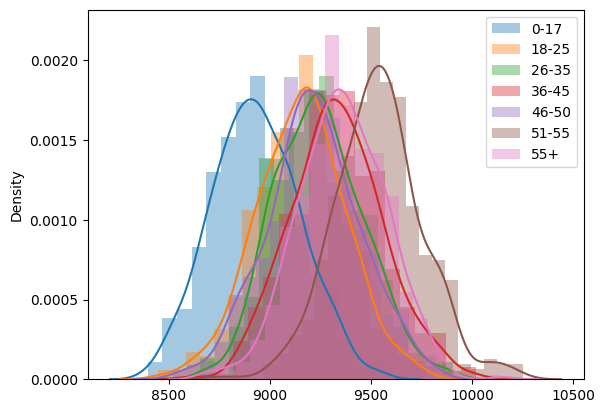

In [ ]:
sns.distplot(sample_0to17, label='0-17' )
sns.distplot(sample_18to25, label='18-25')
sns.distplot(sample_26to35, label='26-35')
sns.distplot(sample_36to45, label='36-45')
sns.distplot(sample_46to50, label='46-50')
sns.distplot(sample_51to55, label='51-55')
sns.distplot(sample_55, label='55+')

plt.legend()
plt.show()

Using the percentile method, we calculate the 95% confidence interval for gender based purchases and marital status based purchases

### CI based on Gender

In [ ]:
male_ci = np.percentile(sample_male,[5,95])
female_ci = np.percentile(sample_female,[5,95])
print("Male confidence inteval",(male_ci))
print("Female confidence inteval",(female_ci))

Male confidence inteval [9084.3991 9802.7708]
Female confidence inteval [8404.6378 9112.079 ]


### CI based on Marital Status

In [ ]:
unmarried_ci = np.percentile(sample_unmarried,[5,95])
married_ci = np.percentile(sample_married,[5,95])
print("Unmarried customer confidence inteval",(unmarried_ci))
print("Married customer confidence inteval",(married_ci))

Unmarried customer confidence inteval [8882.1608 9642.1173]
Married customer confidence inteval [8915.6618 9638.7943]


### CI based on age

In [ ]:
ci_0to17 = np.percentile(sample_0to17 ,[5,95])
ci_18to25 = np.percentile(sample_18to25,[5,95])
ci_26to35 = np.percentile(sample_26to35,[5,95])
ci_36to45 = np.percentile(sample_36to45,[5,95])
ci_46to50 = np.percentile(sample_46to50,[5,95])
ci_51to55 = np.percentile(sample_51to55,[5,95])
ci_55 = np.percentile(sample_55,[5,95])


print("0-17 age group confidence inteval",(ci_0to17))
print("18-25 age group confidence inteval",(ci_18to25))
print("26-35 age group confidence inteval",(ci_26to35))
print("36-45 age group confidence inteval",(ci_36to45))
print("46-50 age group confidence inteval",(ci_46to50))
print("51-55 age group confidence inteval",(ci_51to55))
print("55+ age group confidence inteval",(ci_55))

0-17 age group confidence inteval [8578.6854 9303.7119]
18-25 age group confidence inteval [8792.0874 9514.9512]
26-35 age group confidence inteval [8914.4165 9609.8757]
36-45 age group confidence inteval [8965.7209 9726.4504]
46-50 age group confidence inteval [8830.7143 9615.8946]
51-55 age group confidence inteval [9189.1704 9885.0367]
55+ age group confidence inteval [9009.3836 9709.5226]


Confidence Intervals of male and female purchases as well as for age groups are overlapping, but only by a small margin

The same can also be seen for the CIs of marital status, but in this case, the overlap is far more bigger

This means that the difference between unmarried and married groups are statistically insignificant

As the amount of overlap increases, the difference between two groups become more statistically insignificant

# Business Insights

* Walmart's lowest spending age groups are the 0-17, 55+ and 51-55 groups.
* The relationship status also didn't mean much for black friday sales.
* The most purchases were made by Males, which makes sense because big ticket items like electronics are mainly purchased by men, and Black Friday is when these buyers make the decision to go for the purchase.
* The 26-35 age group is the perfect demographic for Black Friday.


# Recommendations

* Culturally, Black Friday sales are mostly for luxury goods, and specifically for electronics. If Walmart wants to see more spending from females, my recommendation is to also put luxury goods intended for Females on sale along with the dominant electronic items.

* Specific products like the ever popular Stanley cups and white goods like refridgerators, washing machines and dishwashers should also be promoted front and center along with other electronics to bring in the female demographic.

* To get 0-17 year olds or the older 51+ crowd, targeted promotional deals for these age groups is another recommendation I have.

* School or education themed offers for not just electronics, but for other items like backpacks, more expensive stationery, and the like would rope in the 0-17 age group.

* For the 51+ age group, you can have loyalty programs if they are long term shoppers at Walmart, and offer promotions on products that that age group prefers.
